<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-for-confimed-new-cases" data-toc-modified-id="Data-for-confimed-new-cases-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data for confimed new cases</a></span></li><li><span><a href="#Loading-the-MCMC-traces-using-pickle" data-toc-modified-id="Loading-the-MCMC-traces-using-pickle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the MCMC traces using pickle</a></span></li><li><span><a href="#Summary-data-about-each-regions" data-toc-modified-id="Summary-data-about-each-regions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary data about each regions</a></span></li><li><span><a href="#Evolution-of-the-number-of-the-exposed-hosts-in-several-regions" data-toc-modified-id="Evolution-of-the-number-of-the-exposed-hosts-in-several-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evolution of the number of the exposed hosts in several regions</a></span></li></ul></div>

In [1]:
import matplotlib as plt
%matplotlib inline
import numpy as np
import pandas as pd

import pickle
import os
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data for confimed new cases

In [4]:
file_loc='community_transmit.xlsx'
dfa = pd.read_excel(file_loc, sheet_name = 'infected',  usecols = "a,b,c,e,f,g,j")
po = pd.read_excel(file_loc, sheet_name = 'population', usecols = "a,b,d,e,f,i")
pops = np.array(po).T
city_name = np.array(po.columns) #

date = np.array(dfa['date']).astype('datetime64[D]') 
recent_data = [[np.array(dfa[po.columns[i]])] for i,_ in enumerate(pops)]

## Loading the MCMC traces using pickle

In [5]:
traces =[]
for _, dat in enumerate(np.array(dfa['date'])):

    filename = 'tr_'+str(dat)[:10]
    with open(os.getcwd()+'/'+ filename + '.pkl', 'rb') as buffer:
        data = pickle.load(buffer)  

    traces.append( data['trace'])

## Summary data about each regions

In [6]:
import arviz as az
all_sum =[]
for j in range(6):
    summary = az.summary(traces[0]).iloc[6+j:6+j+1, 0:4]
    for i in range(1,len(traces)):
        summary = summary.append(az.summary(traces[i]).iloc[6+j:6+j+1, 0:4])
    all_sum.append(summary)

## Evolution of the number of the exposed hosts in several regions

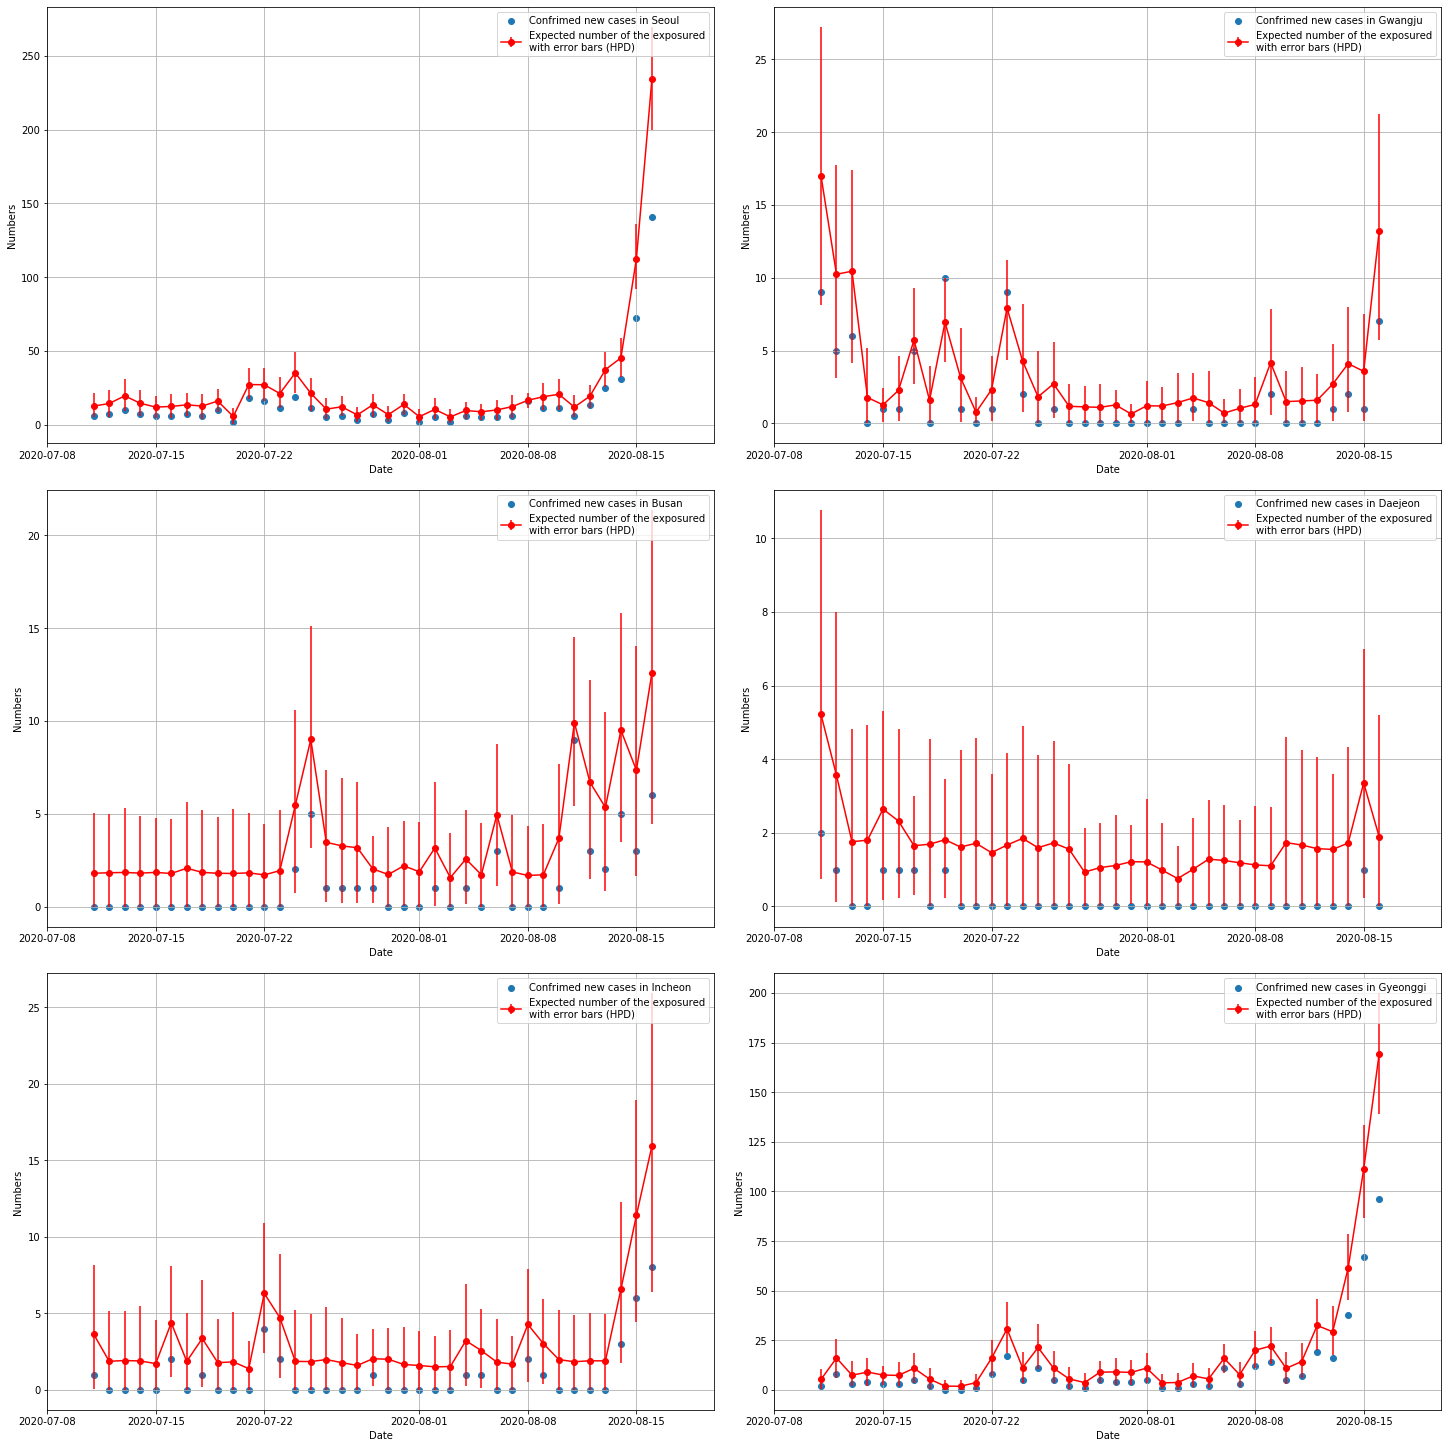

In [8]:
_, ax = plt.pyplot.subplots(3,2, figsize=(20,20), constrained_layout=True)

for i,_ in enumerate(pops):    
    0,0, 0,
    ax[i%3, i//3].scatter (date, recent_data[i], label = 'Confrimed new cases in {:s}'.format(city_name[i]))
    ax[i%3, i//3].errorbar(date, all_sum[i]['mean'], 
                           yerr =[all_sum[i]['mean']-all_sum[i]['hpd_3%'], 
                           all_sum[i]['hpd_97%']-all_sum[i]['mean']],
                           marker='o', color='r',
                           label = 'Expected number of the exposured\nwith error bars (HPD)') 

    ax[i%3, i//3].set_xlim('2020-07-08','2020-08-20')
    #ax[i%3, i//3].set_ylim(0, 40)
    ax[i%3, i//3].set_xlabel('Date')
    ax[i%3, i//3].set_ylabel('Numbers')
    ax[i%3, i//3].legend()
    ax[i%3, i//3].grid();